# Stimuli using Bézier Curves

In [1]:
%matplotlib inline

import os
from pathlib import Path

import numpy as np
import scipy

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import *

import pygestalt as gs
from pygestalt import sampler

import skimage as ski

In [2]:
outdir = Path(os.getcwd()) / 'outputs'
os.makedirs(outdir, exist_ok=True)

## Construction of a Bézier curve

We construct a Bézier curve by specifying a sequence of control points, with the first and the last one corresponding to the starting and the ending position of the curve.

#### A random Bezier curve

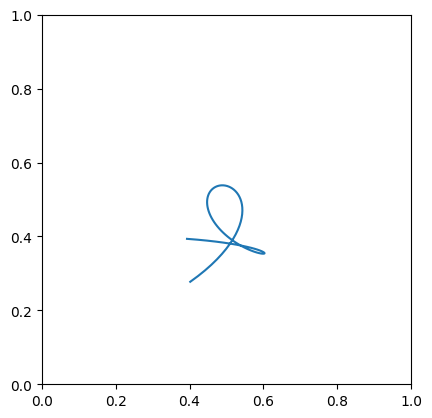

In [3]:
Ps = np.random.uniform(size=(6,2))
# Ps = np.vstack([[0.2,0], Ps, [0.8,1]])
bx, by = gs.sampler.bezier_curve_position(np.linspace(0,1,100),Ps).T

plt.plot(bx,by)
ax = plt.gca()
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')

### A fixed Bezier curve

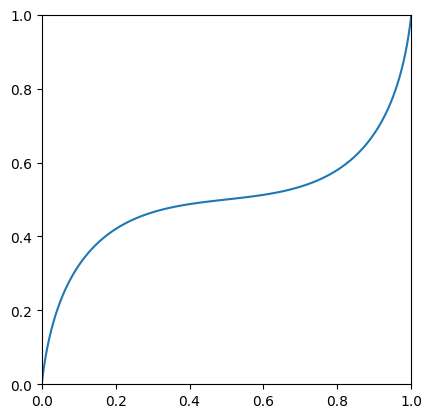

In [4]:
# Ps = np.random.uniform(size=(4,2))
# Ps = np.vstack([[0.2,0], Ps, [0.8,1]])

Ps = np.array([[0.,0.], [0.1,0.9], [0.9,0.1], [1.,1.]])
bx, by = gs.sampler.bezier_curve_position(np.linspace(0,1,100),Ps).T

plt.plot(bx,by)
ax = plt.gca()
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_aspect('equal')

## Generate random stimuli using Bezier curves

In [5]:
radius = 0.02
thresh = 1e-3

%time C, H = sampler.draw_positions(radius, sampler.bezier_curve(Ps), thresh=thresh)
%time D, _ = sampler.draw_positions(radius, sampler.box(), exclusions=C, thresh=thresh)

CPU times: user 6.48 s, sys: 59.3 ms, total: 6.54 s
Wall time: 6.49 s
CPU times: user 32.6 s, sys: 3.53 ms, total: 32.6 s
Wall time: 32.7 s


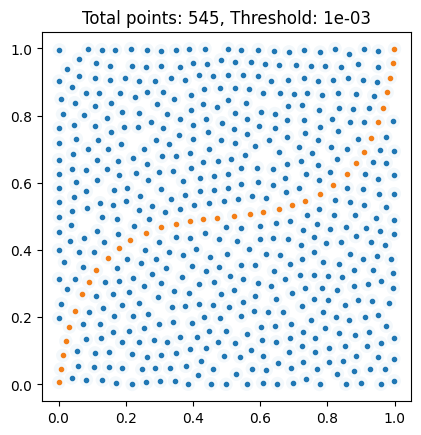

In [6]:
fig, ax = gs.utils.ball_plot(D, C, radius=radius, thresh=thresh)

### Perfectly aligned segments

In [7]:
# Define the patch function

l=0.025
w=0.005
pfunc = lambda z,h: gs.patch.segment(z, h, l, w)

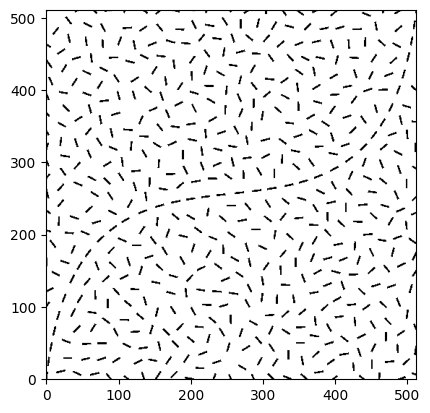

In [8]:
N = 512
If = gs.patch.generate_image(C, H, N=N, pfunc=pfunc)
Ig = gs.patch.generate_image(D, N=N, pfunc=pfunc)

I = If + Ig

Im = I.copy()
# Im = np.fliplr(np.rot90(Im,-1))

plt.imshow(Im, aspect='equal', origin='lower', cmap='binary')
# plt.set_cmap('binary')

### Add jitters

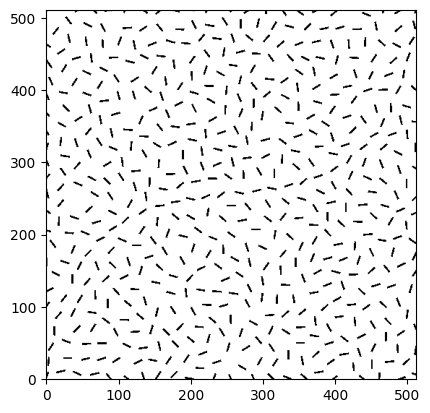

In [21]:
# H1 = H + np.random.randn(*H.shape) * 0.25
H1 = gs.utils.add_jitter(H[:,0], H[:,1], 30).T

If = gs.patch.generate_image(C, H1, N=N, pfunc=pfunc)

I = If + Ig

Im = I.copy()
# Im = np.fliplr(np.rot90(Im,-1))

plt.imshow(Im, aspect='equal', origin='lower', cmap='binary')
# plt.set_cmap('binary')

### Same generation but with Gabor patches

In [22]:
f = 100
σ2 = 0.002
pfunc = lambda z,h: gs.patch.gabor(z, h, f, σ2)

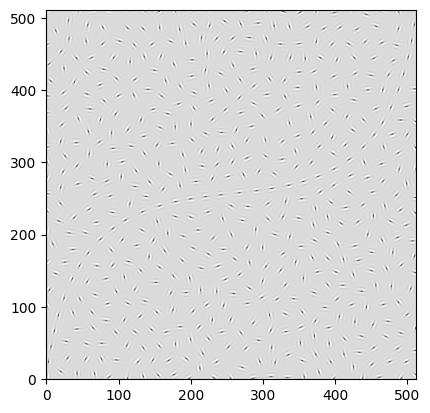

In [23]:
N = 512
If = gs.patch.generate_image(C, H, N=N, pfunc=pfunc)
Ig = gs.patch.generate_image(D, N=N, pfunc=pfunc)
I = If + Ig

plt.imshow(I, aspect='equal', origin='lower', cmap='Greys')

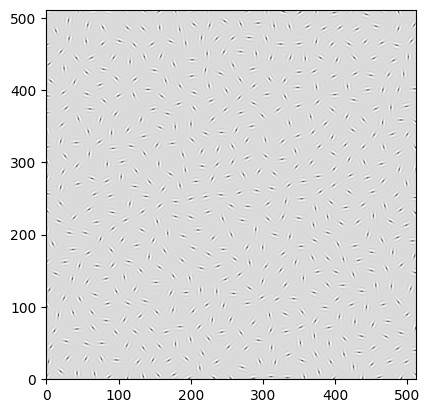

In [24]:
# H1 = H + np.random.randn(*H.shape) * 0.25
H1 = gs.utils.add_jitter(H[:,0], H[:,1], 30).T

If = gs.patch.generate_image(C, H1, N=N, pfunc=pfunc)
I = If + Ig

plt.imshow(I, aspect='equal', origin='lower', cmap='Greys')


# EOF